# Similar means 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
priyanagda_cuhk03_path = kagglehub.dataset_download('priyanagda/cuhk03')

print('Data source import complete.')


100%|██████████| 2.69G/2.69G [01:32<00:00, 31.1MB/s]

Extracting files...


Data source import complete.


In [3]:
tuples=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
'''/root/.cache/kagglehub/datasets/priyanagda/cuhk03/versions/3/archive/images_labeled/1_313_2_09.png
'''
for dirname, _, filenames in os.walk(priyanagda_cuhk03_path):
    for filename in filenames:

      if dirname[-14:]=='images_labeled':
        datapoint=[filename[0:5],filename[6],os.path.join(dirname, filename)]
        tuples.append(datapoint)

data=pd.DataFrame(tuples,columns=['id','Orientation','path'])
data

,id,Orientation,path
0,1_469,1,/root/.cache/kagglehub/datasets/priyanagda/cuh...
1,2_023,2,/root/.cache/kagglehub/datasets/priyanagda/cuh...
2,1_833,1,/root/.cache/kagglehub/datasets/priyanagda/cuh...
3,2_211,1,/root/.cache/kagglehub/datasets/priyanagda/cuh...
4,3_034,2,/root/.cache/kagglehub/datasets/priyanagda/cuh...
...,...,...,...
14091,1_155,1,/root/.cache/kagglehub/datasets/priyanagda/cuh...
14092,2_268,2,/root/.cache/kagglehub/datasets/priyanagda/cuh...
14093,2_328,2,/root/.cache/kagglehub/datasets/priyanagda/cuh...
14094,1_644,1,/root/.cache/kagglehub/datasets/priyanagda/cuh...


In [ ]:
for i,j in enumerate(list(data['id'])):
  if j[0]=='1' and j[2:5]=='001':
    path1=list(data['path'])[i]
    break
for i,j in enumerate(list(data['id'])):
  if j[0]=='2' and j[2:5]=='001':
    path2=list(data['path'])[i]
    break
print(path1,path2)

/root/.cache/kagglehub/datasets/priyanagda/cuhk03/versions/3/archive/images_labeled/1_001_2_06.png /root/.cache/kagglehub/datasets/priyanagda/cuhk03/versions/3/archive/images_labeled/2_001_1_05.png


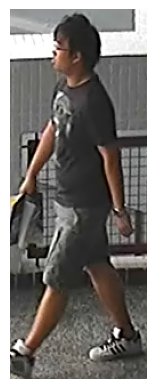

In [ ]:
display_image(path1)

#Preparing Data

In [4]:
import random
# for each identity: Choose random k, sample k images of same identity and add into persons list
# and id into ids list
persons=[]
ids=[]

unique_ids = data['id'].unique()  # Get unique identities
X_train=[]
y_train=[]
for identity in unique_ids:
    # Filter data for the current identity
    identity_data = data[data['id'] == identity]

# Creating Positive pairs(Similar i.e. y=1)
    for _ in range(5):
      k1 = random.randint(1, 10)
      k2 = random.randint(1, 10)
      while k1>7 and k2>7 and k1-k2<=1:
        k1 = random.randint(1, 10)
        k2 = random.randint(1, 10)
      # Sample k images if available, otherwise sample all
      num_samples = min(k1, len(identity_data))
      sampled_data1 = identity_data.sample(n=num_samples)
      # Sample k images if available, otherwise sample all
      num_samples = min(k2, len(identity_data))
      sampled_data2 = identity_data.sample(n=num_samples)

      X_train.append([sampled_data1,sampled_data2])
      y_train.append(1)
# Creating Negative pairs(Dissimilar i.e. y=0)
    for _ in range(7):
      different_identity = np.random.choice(unique_ids)
      while different_identity == identity:
        different_identity = np.random.choice(unique_ids)
      different_data = data[data['id'] == different_identity]

      k1 = random.randint(1, 10)
      k2 = random.randint(1, 10)
      while k1>7 and k2>7 and k1-k2<=1:
        k1 = random.randint(1, 10)
        k2 = random.randint(1, 10)
      # Sample k images if available, otherwise sample all
      num_samples = min(k1, len(identity_data))
      sampled_data1 = identity_data.sample(n=num_samples)
      # Sample k images if available, otherwise sample all
      num_samples = min(k2, len(different_data))
      sampled_data2 = different_data.sample(n=num_samples)

      X_train.append([sampled_data1,sampled_data2])
      y_train.append(0)

len(X_train),len(y_train)

(17604, 17604)

In [ ]:
idx=3
len(X_train[idx][0]),len(X_train[idx][1]),y_train[idx]

(9, 5, 1)

# Model Code

In [5]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git
!pip install clip
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-epc4cs13
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-epc4cs13
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=76f6a751e6bccb985c57aa7f69b5512d706e4f222bd626cfda01b149a06313d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-n1jyb3r_/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt,image as mpimg
from torch.optim import Adam
from torchvision import transforms as transforms
import numpy as np
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,random_split
import torch.optim as optim
# from torchvision.models.resnet import Bottleneck
from PIL import Image
import clip


from matplotlib import pyplot as plt,image as mpimg #Make sure you have imported the necessary modules

def display_image(image_path):
    """
    Displays an image using matplotlib.

    Args:
      image_path: Path to the image file.
    """
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off') # Hide axes
    plt.show()

In [7]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [8]:
base_model, transform = clip.load("ViT-B/16",device=device)

100%|███████████████████████████████████████| 335M/335M [00:06<00:00, 57.3MiB/s]


In [9]:
class SiameseDataset(Dataset):
    def __init__(self, X, Y, transform=None):
        self.X = X
        self.Y = Y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        img_set1 = []
        img_set2 = []
# X[idx][1] has  sampled tuples from a dataframe
        for i in self.X[idx][0]['path'].values:
          temp=Image.open(i).convert('RGB')
          if self.transform:
            temp=self.transform(temp)
          img_set1.append(temp)
        for i in self.X[idx][1]['path'].values:
          temp=Image.open(i).convert('RGB')
          if self.transform:
            temp=self.transform(temp)
          img_set2.append(temp)


        label = self.Y[idx]
        label = torch.tensor(label, dtype=torch.float32)
        return img_set1,img_set2, label


train_data=SiameseDataset(X_train,y_train,transform=transform)

In [ ]:
point=train_data[0]
len(point[0]),len(point[1]),point[0][0].shape,point[2]

(5, 7, torch.Size([3, 224, 224]), tensor(1.))

In [10]:
from torch.nn.utils.rnn import pad_sequence

def siamese_collate_fn(batch):
    img_set1, img_set2, labels = zip(*batch)  # Unzip the batch

    # Stack and pad the sequences in each batch
    padded_img_set1 = pad_sequence([torch.stack(imgs) for imgs in img_set1], batch_first=True)  # Shape: (batch_size, max_len_set1, C, H, W)
    padded_img_set2 = pad_sequence([torch.stack(imgs) for imgs in img_set2], batch_first=True)  # Shape: (batch_size, max_len_set2, C, H, W)

    # Create attention masks: 1 for real data, 0 for padding
    mask_set1 = torch.tensor([[1] * len(imgs) + [0] * (padded_img_set1.size(1) - len(imgs)) for imgs in img_set1], dtype=torch.bool)
    mask_set2 = torch.tensor([[1] * len(imgs) + [0] * (padded_img_set2.size(1) - len(imgs)) for imgs in img_set2], dtype=torch.bool)

    labels = torch.tensor(labels, dtype=torch.float32)  # Stack labels

    return padded_img_set1, padded_img_set2, mask_set1, mask_set2, labels


In [11]:
batch_size=4
train_loader = DataLoader(train_data, batch_size=batch_size, collate_fn=siamese_collate_fn, shuffle=True)

In [ ]:
len(train_loader)

551

#**Architectural Part**

In [12]:
class Contrastive_loss_fn(nn.Module):
    def __init__(self, margin):
        super(Contrastive_loss_fn, self).__init__()
        self.margin = torch.tensor(margin, device='cuda')

    def forward(self, output1, output2, label):
        cosine_sim = F.cosine_similarity(output1, output2)
        cosine_dist = 1.0-cosine_sim
        loss_contrastive = torch.mean((label) * torch.pow(cosine_dist, 2) +
                                      (1 - label) * torch.pow(torch.clamp(self.margin - cosine_dist, min=0.0), 2))
        return loss_contrastive

In [14]:
# Define the Backbone Class (same as your original SiameseNetwork without Siamese functionality)
class BackboneNetwork(nn.Module):
    def __init__(self, emb_dim, model):
        super(BackboneNetwork, self).__init__()
        self.encoder_model = model
        self.classifier = nn.Linear(in_features=512, out_features=emb_dim)
        self.relu = nn.ReLU()

    def encode_one_image(self, x):
        x = self.encoder_model.encode_image(x)
        x = self.classifier(x.float())
        x = self.relu(x)
        return x

    def forward(self, x):
        return self.encode_one_image(x)

# Initialize the backbone with pretrained weights
emb_dim = 1024

#model was initially the clip model
backbone = BackboneNetwork(emb_dim=emb_dim, model=base_model)


model_path='/content/drive/MyDrive/Person ReIdentification/clip_transformer_model_parameters.pth'
# Load the pretrained weights (assumes you have saved the weights as "backbone_weights.pth")
backbone.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))
print("Backbone loaded with pretrained weights.")

# freezing the backbone
for param in backbone.parameters():
    param.requires_grad = False

<ipython-input-14-e45ab9f00f3d>:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  backbone.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))


RuntimeError: Error(s) in loading state_dict for BackboneNetwork:
	Missing key(s) in state_dict: "encoder_model.positional_embedding", "encoder_model.text_projection", "encoder_model.logit_scale", "encoder_model.visual.class_embedding", "encoder_model.visual.positional_embedding", "encoder_model.visual.proj", "encoder_model.visual.conv1.weight", "encoder_model.visual.ln_pre.weight", "encoder_model.visual.ln_pre.bias", "encoder_model.visual.transformer.resblocks.0.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.0.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.0.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.0.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.0.ln_1.weight", "encoder_model.visual.transformer.resblocks.0.ln_1.bias", "encoder_model.visual.transformer.resblocks.0.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.0.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.0.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.0.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.0.ln_2.weight", "encoder_model.visual.transformer.resblocks.0.ln_2.bias", "encoder_model.visual.transformer.resblocks.1.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.1.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.1.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.1.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.1.ln_1.weight", "encoder_model.visual.transformer.resblocks.1.ln_1.bias", "encoder_model.visual.transformer.resblocks.1.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.1.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.1.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.1.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.1.ln_2.weight", "encoder_model.visual.transformer.resblocks.1.ln_2.bias", "encoder_model.visual.transformer.resblocks.2.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.2.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.2.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.2.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.2.ln_1.weight", "encoder_model.visual.transformer.resblocks.2.ln_1.bias", "encoder_model.visual.transformer.resblocks.2.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.2.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.2.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.2.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.2.ln_2.weight", "encoder_model.visual.transformer.resblocks.2.ln_2.bias", "encoder_model.visual.transformer.resblocks.3.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.3.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.3.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.3.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.3.ln_1.weight", "encoder_model.visual.transformer.resblocks.3.ln_1.bias", "encoder_model.visual.transformer.resblocks.3.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.3.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.3.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.3.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.3.ln_2.weight", "encoder_model.visual.transformer.resblocks.3.ln_2.bias", "encoder_model.visual.transformer.resblocks.4.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.4.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.4.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.4.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.4.ln_1.weight", "encoder_model.visual.transformer.resblocks.4.ln_1.bias", "encoder_model.visual.transformer.resblocks.4.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.4.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.4.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.4.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.4.ln_2.weight", "encoder_model.visual.transformer.resblocks.4.ln_2.bias", "encoder_model.visual.transformer.resblocks.5.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.5.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.5.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.5.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.5.ln_1.weight", "encoder_model.visual.transformer.resblocks.5.ln_1.bias", "encoder_model.visual.transformer.resblocks.5.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.5.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.5.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.5.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.5.ln_2.weight", "encoder_model.visual.transformer.resblocks.5.ln_2.bias", "encoder_model.visual.transformer.resblocks.6.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.6.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.6.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.6.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.6.ln_1.weight", "encoder_model.visual.transformer.resblocks.6.ln_1.bias", "encoder_model.visual.transformer.resblocks.6.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.6.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.6.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.6.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.6.ln_2.weight", "encoder_model.visual.transformer.resblocks.6.ln_2.bias", "encoder_model.visual.transformer.resblocks.7.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.7.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.7.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.7.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.7.ln_1.weight", "encoder_model.visual.transformer.resblocks.7.ln_1.bias", "encoder_model.visual.transformer.resblocks.7.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.7.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.7.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.7.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.7.ln_2.weight", "encoder_model.visual.transformer.resblocks.7.ln_2.bias", "encoder_model.visual.transformer.resblocks.8.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.8.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.8.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.8.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.8.ln_1.weight", "encoder_model.visual.transformer.resblocks.8.ln_1.bias", "encoder_model.visual.transformer.resblocks.8.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.8.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.8.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.8.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.8.ln_2.weight", "encoder_model.visual.transformer.resblocks.8.ln_2.bias", "encoder_model.visual.transformer.resblocks.9.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.9.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.9.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.9.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.9.ln_1.weight", "encoder_model.visual.transformer.resblocks.9.ln_1.bias", "encoder_model.visual.transformer.resblocks.9.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.9.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.9.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.9.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.9.ln_2.weight", "encoder_model.visual.transformer.resblocks.9.ln_2.bias", "encoder_model.visual.transformer.resblocks.10.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.10.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.10.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.10.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.10.ln_1.weight", "encoder_model.visual.transformer.resblocks.10.ln_1.bias", "encoder_model.visual.transformer.resblocks.10.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.10.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.10.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.10.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.10.ln_2.weight", "encoder_model.visual.transformer.resblocks.10.ln_2.bias", "encoder_model.visual.transformer.resblocks.11.attn.in_proj_weight", "encoder_model.visual.transformer.resblocks.11.attn.in_proj_bias", "encoder_model.visual.transformer.resblocks.11.attn.out_proj.weight", "encoder_model.visual.transformer.resblocks.11.attn.out_proj.bias", "encoder_model.visual.transformer.resblocks.11.ln_1.weight", "encoder_model.visual.transformer.resblocks.11.ln_1.bias", "encoder_model.visual.transformer.resblocks.11.mlp.c_fc.weight", "encoder_model.visual.transformer.resblocks.11.mlp.c_fc.bias", "encoder_model.visual.transformer.resblocks.11.mlp.c_proj.weight", "encoder_model.visual.transformer.resblocks.11.mlp.c_proj.bias", "encoder_model.visual.transformer.resblocks.11.ln_2.weight", "encoder_model.visual.transformer.resblocks.11.ln_2.bias", "encoder_model.visual.ln_post.weight", "encoder_model.visual.ln_post.bias", "encoder_model.transformer.resblocks.0.attn.in_proj_weight", "encoder_model.transformer.resblocks.0.attn.in_proj_bias", "encoder_model.transformer.resblocks.0.attn.out_proj.weight", "encoder_model.transformer.resblocks.0.attn.out_proj.bias", "encoder_model.transformer.resblocks.0.ln_1.weight", "encoder_model.transformer.resblocks.0.ln_1.bias", "encoder_model.transformer.resblocks.0.mlp.c_fc.weight", "encoder_model.transformer.resblocks.0.mlp.c_fc.bias", "encoder_model.transformer.resblocks.0.mlp.c_proj.weight", "encoder_model.transformer.resblocks.0.mlp.c_proj.bias", "encoder_model.transformer.resblocks.0.ln_2.weight", "encoder_model.transformer.resblocks.0.ln_2.bias", "encoder_model.transformer.resblocks.1.attn.in_proj_weight", "encoder_model.transformer.resblocks.1.attn.in_proj_bias", "encoder_model.transformer.resblocks.1.attn.out_proj.weight", "encoder_model.transformer.resblocks.1.attn.out_proj.bias", "encoder_model.transformer.resblocks.1.ln_1.weight", "encoder_model.transformer.resblocks.1.ln_1.bias", "encoder_model.transformer.resblocks.1.mlp.c_fc.weight", "encoder_model.transformer.resblocks.1.mlp.c_fc.bias", "encoder_model.transformer.resblocks.1.mlp.c_proj.weight", "encoder_model.transformer.resblocks.1.mlp.c_proj.bias", "encoder_model.transformer.resblocks.1.ln_2.weight", "encoder_model.transformer.resblocks.1.ln_2.bias", "encoder_model.transformer.resblocks.2.attn.in_proj_weight", "encoder_model.transformer.resblocks.2.attn.in_proj_bias", "encoder_model.transformer.resblocks.2.attn.out_proj.weight", "encoder_model.transformer.resblocks.2.attn.out_proj.bias", "encoder_model.transformer.resblocks.2.ln_1.weight", "encoder_model.transformer.resblocks.2.ln_1.bias", "encoder_model.transformer.resblocks.2.mlp.c_fc.weight", "encoder_model.transformer.resblocks.2.mlp.c_fc.bias", "encoder_model.transformer.resblocks.2.mlp.c_proj.weight", "encoder_model.transformer.resblocks.2.mlp.c_proj.bias", "encoder_model.transformer.resblocks.2.ln_2.weight", "encoder_model.transformer.resblocks.2.ln_2.bias", "encoder_model.transformer.resblocks.3.attn.in_proj_weight", "encoder_model.transformer.resblocks.3.attn.in_proj_bias", "encoder_model.transformer.resblocks.3.attn.out_proj.weight", "encoder_model.transformer.resblocks.3.attn.out_proj.bias", "encoder_model.transformer.resblocks.3.ln_1.weight", "encoder_model.transformer.resblocks.3.ln_1.bias", "encoder_model.transformer.resblocks.3.mlp.c_fc.weight", "encoder_model.transformer.resblocks.3.mlp.c_fc.bias", "encoder_model.transformer.resblocks.3.mlp.c_proj.weight", "encoder_model.transformer.resblocks.3.mlp.c_proj.bias", "encoder_model.transformer.resblocks.3.ln_2.weight", "encoder_model.transformer.resblocks.3.ln_2.bias", "encoder_model.transformer.resblocks.4.attn.in_proj_weight", "encoder_model.transformer.resblocks.4.attn.in_proj_bias", "encoder_model.transformer.resblocks.4.attn.out_proj.weight", "encoder_model.transformer.resblocks.4.attn.out_proj.bias", "encoder_model.transformer.resblocks.4.ln_1.weight", "encoder_model.transformer.resblocks.4.ln_1.bias", "encoder_model.transformer.resblocks.4.mlp.c_fc.weight", "encoder_model.transformer.resblocks.4.mlp.c_fc.bias", "encoder_model.transformer.resblocks.4.mlp.c_proj.weight", "encoder_model.transformer.resblocks.4.mlp.c_proj.bias", "encoder_model.transformer.resblocks.4.ln_2.weight", "encoder_model.transformer.resblocks.4.ln_2.bias", "encoder_model.transformer.resblocks.5.attn.in_proj_weight", "encoder_model.transformer.resblocks.5.attn.in_proj_bias", "encoder_model.transformer.resblocks.5.attn.out_proj.weight", "encoder_model.transformer.resblocks.5.attn.out_proj.bias", "encoder_model.transformer.resblocks.5.ln_1.weight", "encoder_model.transformer.resblocks.5.ln_1.bias", "encoder_model.transformer.resblocks.5.mlp.c_fc.weight", "encoder_model.transformer.resblocks.5.mlp.c_fc.bias", "encoder_model.transformer.resblocks.5.mlp.c_proj.weight", "encoder_model.transformer.resblocks.5.mlp.c_proj.bias", "encoder_model.transformer.resblocks.5.ln_2.weight", "encoder_model.transformer.resblocks.5.ln_2.bias", "encoder_model.transformer.resblocks.6.attn.in_proj_weight", "encoder_model.transformer.resblocks.6.attn.in_proj_bias", "encoder_model.transformer.resblocks.6.attn.out_proj.weight", "encoder_model.transformer.resblocks.6.attn.out_proj.bias", "encoder_model.transformer.resblocks.6.ln_1.weight", "encoder_model.transformer.resblocks.6.ln_1.bias", "encoder_model.transformer.resblocks.6.mlp.c_fc.weight", "encoder_model.transformer.resblocks.6.mlp.c_fc.bias", "encoder_model.transformer.resblocks.6.mlp.c_proj.weight", "encoder_model.transformer.resblocks.6.mlp.c_proj.bias", "encoder_model.transformer.resblocks.6.ln_2.weight", "encoder_model.transformer.resblocks.6.ln_2.bias", "encoder_model.transformer.resblocks.7.attn.in_proj_weight", "encoder_model.transformer.resblocks.7.attn.in_proj_bias", "encoder_model.transformer.resblocks.7.attn.out_proj.weight", "encoder_model.transformer.resblocks.7.attn.out_proj.bias", "encoder_model.transformer.resblocks.7.ln_1.weight", "encoder_model.transformer.resblocks.7.ln_1.bias", "encoder_model.transformer.resblocks.7.mlp.c_fc.weight", "encoder_model.transformer.resblocks.7.mlp.c_fc.bias", "encoder_model.transformer.resblocks.7.mlp.c_proj.weight", "encoder_model.transformer.resblocks.7.mlp.c_proj.bias", "encoder_model.transformer.resblocks.7.ln_2.weight", "encoder_model.transformer.resblocks.7.ln_2.bias", "encoder_model.transformer.resblocks.8.attn.in_proj_weight", "encoder_model.transformer.resblocks.8.attn.in_proj_bias", "encoder_model.transformer.resblocks.8.attn.out_proj.weight", "encoder_model.transformer.resblocks.8.attn.out_proj.bias", "encoder_model.transformer.resblocks.8.ln_1.weight", "encoder_model.transformer.resblocks.8.ln_1.bias", "encoder_model.transformer.resblocks.8.mlp.c_fc.weight", "encoder_model.transformer.resblocks.8.mlp.c_fc.bias", "encoder_model.transformer.resblocks.8.mlp.c_proj.weight", "encoder_model.transformer.resblocks.8.mlp.c_proj.bias", "encoder_model.transformer.resblocks.8.ln_2.weight", "encoder_model.transformer.resblocks.8.ln_2.bias", "encoder_model.transformer.resblocks.9.attn.in_proj_weight", "encoder_model.transformer.resblocks.9.attn.in_proj_bias", "encoder_model.transformer.resblocks.9.attn.out_proj.weight", "encoder_model.transformer.resblocks.9.attn.out_proj.bias", "encoder_model.transformer.resblocks.9.ln_1.weight", "encoder_model.transformer.resblocks.9.ln_1.bias", "encoder_model.transformer.resblocks.9.mlp.c_fc.weight", "encoder_model.transformer.resblocks.9.mlp.c_fc.bias", "encoder_model.transformer.resblocks.9.mlp.c_proj.weight", "encoder_model.transformer.resblocks.9.mlp.c_proj.bias", "encoder_model.transformer.resblocks.9.ln_2.weight", "encoder_model.transformer.resblocks.9.ln_2.bias", "encoder_model.transformer.resblocks.10.attn.in_proj_weight", "encoder_model.transformer.resblocks.10.attn.in_proj_bias", "encoder_model.transformer.resblocks.10.attn.out_proj.weight", "encoder_model.transformer.resblocks.10.attn.out_proj.bias", "encoder_model.transformer.resblocks.10.ln_1.weight", "encoder_model.transformer.resblocks.10.ln_1.bias", "encoder_model.transformer.resblocks.10.mlp.c_fc.weight", "encoder_model.transformer.resblocks.10.mlp.c_fc.bias", "encoder_model.transformer.resblocks.10.mlp.c_proj.weight", "encoder_model.transformer.resblocks.10.mlp.c_proj.bias", "encoder_model.transformer.resblocks.10.ln_2.weight", "encoder_model.transformer.resblocks.10.ln_2.bias", "encoder_model.transformer.resblocks.11.attn.in_proj_weight", "encoder_model.transformer.resblocks.11.attn.in_proj_bias", "encoder_model.transformer.resblocks.11.attn.out_proj.weight", "encoder_model.transformer.resblocks.11.attn.out_proj.bias", "encoder_model.transformer.resblocks.11.ln_1.weight", "encoder_model.transformer.resblocks.11.ln_1.bias", "encoder_model.transformer.resblocks.11.mlp.c_fc.weight", "encoder_model.transformer.resblocks.11.mlp.c_fc.bias", "encoder_model.transformer.resblocks.11.mlp.c_proj.weight", "encoder_model.transformer.resblocks.11.mlp.c_proj.bias", "encoder_model.transformer.resblocks.11.ln_2.weight", "encoder_model.transformer.resblocks.11.ln_2.bias", "encoder_model.token_embedding.weight", "encoder_model.ln_final.weight", "encoder_model.ln_final.bias", "classifier.weight", "classifier.bias". 
	Unexpected key(s) in state_dict: "backbone.encoder_model.positional_embedding", "backbone.encoder_model.text_projection", "backbone.encoder_model.logit_scale", "backbone.encoder_model.visual.class_embedding", "backbone.encoder_model.visual.positional_embedding", "backbone.encoder_model.visual.proj", "backbone.encoder_model.visual.conv1.weight", "backbone.encoder_model.visual.ln_pre.weight", "backbone.encoder_model.visual.ln_pre.bias", "backbone.encoder_model.visual.transformer.resblocks.0.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.0.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.0.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.0.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.0.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.0.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.0.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.0.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.0.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.0.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.0.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.0.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.1.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.1.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.1.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.1.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.1.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.1.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.1.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.1.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.1.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.1.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.1.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.1.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.2.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.2.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.2.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.2.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.2.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.2.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.2.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.2.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.2.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.2.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.2.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.2.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.3.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.3.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.3.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.3.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.3.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.3.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.3.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.3.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.3.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.3.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.3.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.3.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.4.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.4.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.4.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.4.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.4.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.4.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.4.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.4.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.4.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.4.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.4.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.4.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.5.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.5.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.5.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.5.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.5.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.5.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.5.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.5.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.5.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.5.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.5.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.5.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.6.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.6.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.6.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.6.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.6.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.6.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.6.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.6.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.6.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.6.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.6.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.6.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.7.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.7.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.7.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.7.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.7.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.7.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.7.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.7.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.7.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.7.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.7.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.7.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.8.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.8.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.8.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.8.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.8.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.8.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.8.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.8.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.8.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.8.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.8.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.8.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.9.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.9.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.9.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.9.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.9.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.9.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.9.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.9.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.9.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.9.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.9.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.9.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.10.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.10.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.10.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.10.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.10.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.10.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.10.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.10.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.10.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.10.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.10.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.10.ln_2.bias", "backbone.encoder_model.visual.transformer.resblocks.11.attn.in_proj_weight", "backbone.encoder_model.visual.transformer.resblocks.11.attn.in_proj_bias", "backbone.encoder_model.visual.transformer.resblocks.11.attn.out_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.11.attn.out_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.11.ln_1.weight", "backbone.encoder_model.visual.transformer.resblocks.11.ln_1.bias", "backbone.encoder_model.visual.transformer.resblocks.11.mlp.c_fc.weight", "backbone.encoder_model.visual.transformer.resblocks.11.mlp.c_fc.bias", "backbone.encoder_model.visual.transformer.resblocks.11.mlp.c_proj.weight", "backbone.encoder_model.visual.transformer.resblocks.11.mlp.c_proj.bias", "backbone.encoder_model.visual.transformer.resblocks.11.ln_2.weight", "backbone.encoder_model.visual.transformer.resblocks.11.ln_2.bias", "backbone.encoder_model.visual.ln_post.weight", "backbone.encoder_model.visual.ln_post.bias", "backbone.encoder_model.transformer.resblocks.0.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.0.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.0.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.0.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.0.ln_1.weight", "backbone.encoder_model.transformer.resblocks.0.ln_1.bias", "backbone.encoder_model.transformer.resblocks.0.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.0.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.0.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.0.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.0.ln_2.weight", "backbone.encoder_model.transformer.resblocks.0.ln_2.bias", "backbone.encoder_model.transformer.resblocks.1.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.1.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.1.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.1.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.1.ln_1.weight", "backbone.encoder_model.transformer.resblocks.1.ln_1.bias", "backbone.encoder_model.transformer.resblocks.1.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.1.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.1.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.1.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.1.ln_2.weight", "backbone.encoder_model.transformer.resblocks.1.ln_2.bias", "backbone.encoder_model.transformer.resblocks.2.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.2.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.2.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.2.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.2.ln_1.weight", "backbone.encoder_model.transformer.resblocks.2.ln_1.bias", "backbone.encoder_model.transformer.resblocks.2.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.2.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.2.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.2.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.2.ln_2.weight", "backbone.encoder_model.transformer.resblocks.2.ln_2.bias", "backbone.encoder_model.transformer.resblocks.3.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.3.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.3.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.3.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.3.ln_1.weight", "backbone.encoder_model.transformer.resblocks.3.ln_1.bias", "backbone.encoder_model.transformer.resblocks.3.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.3.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.3.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.3.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.3.ln_2.weight", "backbone.encoder_model.transformer.resblocks.3.ln_2.bias", "backbone.encoder_model.transformer.resblocks.4.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.4.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.4.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.4.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.4.ln_1.weight", "backbone.encoder_model.transformer.resblocks.4.ln_1.bias", "backbone.encoder_model.transformer.resblocks.4.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.4.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.4.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.4.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.4.ln_2.weight", "backbone.encoder_model.transformer.resblocks.4.ln_2.bias", "backbone.encoder_model.transformer.resblocks.5.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.5.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.5.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.5.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.5.ln_1.weight", "backbone.encoder_model.transformer.resblocks.5.ln_1.bias", "backbone.encoder_model.transformer.resblocks.5.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.5.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.5.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.5.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.5.ln_2.weight", "backbone.encoder_model.transformer.resblocks.5.ln_2.bias", "backbone.encoder_model.transformer.resblocks.6.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.6.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.6.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.6.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.6.ln_1.weight", "backbone.encoder_model.transformer.resblocks.6.ln_1.bias", "backbone.encoder_model.transformer.resblocks.6.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.6.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.6.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.6.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.6.ln_2.weight", "backbone.encoder_model.transformer.resblocks.6.ln_2.bias", "backbone.encoder_model.transformer.resblocks.7.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.7.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.7.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.7.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.7.ln_1.weight", "backbone.encoder_model.transformer.resblocks.7.ln_1.bias", "backbone.encoder_model.transformer.resblocks.7.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.7.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.7.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.7.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.7.ln_2.weight", "backbone.encoder_model.transformer.resblocks.7.ln_2.bias", "backbone.encoder_model.transformer.resblocks.8.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.8.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.8.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.8.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.8.ln_1.weight", "backbone.encoder_model.transformer.resblocks.8.ln_1.bias", "backbone.encoder_model.transformer.resblocks.8.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.8.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.8.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.8.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.8.ln_2.weight", "backbone.encoder_model.transformer.resblocks.8.ln_2.bias", "backbone.encoder_model.transformer.resblocks.9.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.9.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.9.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.9.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.9.ln_1.weight", "backbone.encoder_model.transformer.resblocks.9.ln_1.bias", "backbone.encoder_model.transformer.resblocks.9.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.9.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.9.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.9.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.9.ln_2.weight", "backbone.encoder_model.transformer.resblocks.9.ln_2.bias", "backbone.encoder_model.transformer.resblocks.10.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.10.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.10.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.10.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.10.ln_1.weight", "backbone.encoder_model.transformer.resblocks.10.ln_1.bias", "backbone.encoder_model.transformer.resblocks.10.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.10.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.10.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.10.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.10.ln_2.weight", "backbone.encoder_model.transformer.resblocks.10.ln_2.bias", "backbone.encoder_model.transformer.resblocks.11.attn.in_proj_weight", "backbone.encoder_model.transformer.resblocks.11.attn.in_proj_bias", "backbone.encoder_model.transformer.resblocks.11.attn.out_proj.weight", "backbone.encoder_model.transformer.resblocks.11.attn.out_proj.bias", "backbone.encoder_model.transformer.resblocks.11.ln_1.weight", "backbone.encoder_model.transformer.resblocks.11.ln_1.bias", "backbone.encoder_model.transformer.resblocks.11.mlp.c_fc.weight", "backbone.encoder_model.transformer.resblocks.11.mlp.c_fc.bias", "backbone.encoder_model.transformer.resblocks.11.mlp.c_proj.weight", "backbone.encoder_model.transformer.resblocks.11.mlp.c_proj.bias", "backbone.encoder_model.transformer.resblocks.11.ln_2.weight", "backbone.encoder_model.transformer.resblocks.11.ln_2.bias", "backbone.encoder_model.token_embedding.weight", "backbone.encoder_model.ln_final.weight", "backbone.encoder_model.ln_final.bias", "backbone.classifier.weight", "backbone.classifier.bias", "transformer_encoder.layers.0.self_attn.in_proj_weight", "transformer_encoder.layers.0.self_attn.in_proj_bias", "transformer_encoder.layers.0.self_attn.out_proj.weight", "transformer_encoder.layers.0.self_attn.out_proj.bias", "transformer_encoder.layers.0.linear1.weight", "transformer_encoder.layers.0.linear1.bias", "transformer_encoder.layers.0.linear2.weight", "transformer_encoder.layers.0.linear2.bias", "transformer_encoder.layers.0.norm1.weight", "transformer_encoder.layers.0.norm1.bias", "transformer_encoder.layers.0.norm2.weight", "transformer_encoder.layers.0.norm2.bias", "transformer_encoder.layers.1.self_attn.in_proj_weight", "transformer_encoder.layers.1.self_attn.in_proj_bias", "transformer_encoder.layers.1.self_attn.out_proj.weight", "transformer_encoder.layers.1.self_attn.out_proj.bias", "transformer_encoder.layers.1.linear1.weight", "transformer_encoder.layers.1.linear1.bias", "transformer_encoder.layers.1.linear2.weight", "transformer_encoder.layers.1.linear2.bias", "transformer_encoder.layers.1.norm1.weight", "transformer_encoder.layers.1.norm1.bias", "transformer_encoder.layers.1.norm2.weight", "transformer_encoder.layers.1.norm2.bias". 

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
class SiameseNetworkWithTransformer(nn.Module):
    def __init__(self, backbone, transformer_dim=1024, num_heads=4, num_layers=2):
        super(SiameseNetworkWithTransformer, self).__init__()
        self.backbone = backbone  # Use the pretrained backbone
        self.emb_dim = backbone.classifier.out_features

        # Transformer Layer
        encoder_layer = TransformerEncoderLayer(d_model=self.emb_dim, nhead=num_heads, dim_feedforward=transformer_dim)
        self.transformer_encoder = TransformerEncoder(encoder_layer, num_layers=num_layers)

    def aggregate_embeddings(self, embeddings, mask):
        # Transformer expects input shape (seq_len, batch, emb_dim), so we transpose
        embeddings = embeddings.permute(1, 0, 2)  # (max_seq_len, batch_size, emb_dim)

        # Apply transformer with mask
        aggregated_embedding = self.transformer_encoder(embeddings, src_key_padding_mask=~mask)  # Mask is inverted

        # Average pooling across the sequence dimension to get a single vector
        aggregated_embedding = aggregated_embedding.mean(dim=0)  # (batch_size, emb_dim)
        return aggregated_embedding

    def forward(self, input1_set, input2_set, mask1, mask2):
        """
        Forward pass for Siamese Network with Transformer aggregation.

        Args:
            input1_set (Tensor): Padded sequence of images from set 1 (batch_size, max_seq_len_set1, C, H, W)
            input2_set (Tensor): Padded sequence of images from set 2 (batch_size, max_seq_len_set2, C, H, W)
            mask1 (Tensor): Attention mask for input1_set (batch_size, max_seq_len_set1)
            mask2 (Tensor): Attention mask for input2_set (batch_size, max_seq_len_set2)

        Returns:
            Tensor: Aggregated embedding for input1_set (batch_size, emb_dim)
            Tensor: Aggregated embedding for input2_set (batch_size, emb_dim)
        """
        # Encode each image in the set individually using the backbone
        embeddings1 = torch.stack([self.backbone(img) for img in input1_set])  # Shape: (batch_size, max_seq_len_set1, emb_dim)
        embeddings2 = torch.stack([self.backbone(img) for img in input2_set])  # Shape: (batch_size, max_seq_len_set2, emb_dim)

        # Aggregate embeddings using transformer with attention masks
        aggregated_embedding1 = self.aggregate_embeddings(embeddings1, mask1)  # Shape: (batch_size, emb_dim)
        aggregated_embedding2 = self.aggregate_embeddings(embeddings2, mask2)  # Shape: (batch_size, emb_dim)

        return aggregated_embedding1, aggregated_embedding2

In [16]:
model = SiameseNetworkWithTransformer(backbone=backbone, transformer_dim=1024, num_heads=4, num_layers=2).to(device)
model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu")))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
<ipython-input-16-20d0dcf03433>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you sta

<All keys matched successfully>

In [17]:
model

SiameseNetworkWithTransformer(
  (backbone): BackboneNetwork(
    (encoder_model): CLIP(
      (visual): VisionTransformer(
        (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
        (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (transformer): Transformer(
          (resblocks): Sequential(
            (0): ResidualAttentionBlock(
              (attn): MultiheadAttention(
                (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
              )
              (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
              (mlp): Sequential(
                (c_fc): Linear(in_features=768, out_features=3072, bias=True)
                (gelu): QuickGELU()
                (c_proj): Linear(in_features=3072, out_features=768, bias=True)
              )
              (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            )
            (1): ResidualAttentionBl

In [ ]:
margin = 1
criterion = Contrastive_loss_fn(margin=margin)
optimizer = Adam(model.parameters(), lr=1e-4)

In [ ]:
# del mask1
# del mask2
# del input1_set
# del input2_set
# del model
# del backbone
# del output1
# del output2
# del loss

In [ ]:
# Set threshold for classification
threshold = 1

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (input1_set, input2_set, mask1, mask2, labels) in enumerate(train_loader):
        # Move data to device
        input1_set, input2_set = input1_set.to(device), input2_set.to(device)
        mask1, mask2 = mask1.to(device), mask2.to(device)
        labels = labels.to(device)

        # Forward pass
        output1, output2 = model(input1_set, input2_set, mask1, mask2)
        del mask1, mask2, input1_set, input2_set  # Free up memory

        # Calculate loss
        loss = criterion(output1, output2, labels)

        # Calculate distances for accuracy
        with torch.no_grad():
            distances = F.cosine_similarity(output1, output2)  # Cosine similarity
            predictions = (distances <= threshold).float()  # Classify based on threshold
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

        del output1, output2, labels
        torch.cuda.empty_cache()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        if i % 10 == 0:  # Print every 10 batches
            accuracy = correct_predictions / total_predictions * 100
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f} Accuracy:{accuracy:.2f}%")
    # Calculate average loss and accuracy for the epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete.")


Epoch [1/10], Step [1/551], Loss: 0.1114 Accuracy:43.75%
Epoch [1/10], Step [11/551], Loss: 0.1309 Accuracy:41.48%
Epoch [1/10], Step [21/551], Loss: 0.1331 Accuracy:44.20%
Epoch [1/10], Step [31/551], Loss: 0.1133 Accuracy:44.05%
Epoch [1/10], Step [41/551], Loss: 0.1037 Accuracy:43.45%
Epoch [1/10], Step [51/551], Loss: 0.0691 Accuracy:42.59%
Epoch [1/10], Step [61/551], Loss: 0.1305 Accuracy:42.32%
Epoch [1/10], Step [71/551], Loss: 0.1356 Accuracy:41.86%
Epoch [1/10], Step [81/551], Loss: 0.0974 Accuracy:41.28%
Epoch [1/10], Step [91/551], Loss: 0.1269 Accuracy:41.41%
Epoch [1/10], Step [101/551], Loss: 0.1540 Accuracy:41.37%
Epoch [1/10], Step [111/551], Loss: 0.1108 Accuracy:41.41%
Epoch [1/10], Step [121/551], Loss: 0.0968 Accuracy:41.53%
Epoch [1/10], Step [131/551], Loss: 0.1165 Accuracy:41.51%
Epoch [1/10], Step [141/551], Loss: 0.1174 Accuracy:41.67%
Epoch [1/10], Step [151/551], Loss: 0.0935 Accuracy:41.72%
Epoch [1/10], Step [161/551], Loss: 0.1225 Accuracy:41.89%
Epoch [1

KeyboardInterrupt: 

In [ ]:
# storing model weights
path="/content/drive/MyDrive/Projects/Minor/clip_transformer_model_parameters.pth"
torch.save(model.state_dict(), path)

In [ ]:
val_size = 100  # Use 1000 tuples for validation
train_size = len(train_data) - val_size

# Split dataset into training and validation sets
train_data, val_data = random_split(train_data, [train_size, val_size])

# Create DataLoader for validation set
val_loader = DataLoader(val_data, batch_size=batch_size, collate_fn=siamese_collate_fn, shuffle=False)
len(val_loader)

4

In [ ]:
import torch.nn.functional as F

def validate_model(model, val_loader, criterion, threshold):
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for input1_set, input2_set, mask1, mask2, labels in val_loader:
            # Move data to device
            input1_set, input2_set = input1_set.to(device), input2_set.to(device)
            mask1, mask2 = mask1.to(device), mask2.to(device)
            labels = labels.to(device)

            # Forward pass
            output1, output2 = model(input1_set, input2_set, mask1, mask2)
            del mask1, mask2, input1_set, input2_set  # Free up memory

            # Calculate loss
            loss = criterion(output1, output2, labels)
            val_loss += loss.item()

            # Calculate distances and predictions based on threshold
            distances = F.cosine_similarity(output1, output2)  # Cosine similarity
            predictions = (distances <= threshold).float()  # Classify based on threshold
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

            del output1, output2, labels  # Free up memory
            torch.cuda.empty_cache()

    # Calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct_predictions / total_predictions * 100

    # print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_val_loss, accuracy

In [ ]:
a=1.1596283346414564
lr=0.1
loss_prev,acc_prev=validate_model(model, val_loader, criterion, threshold=a)

print(f'threshold:{a} loss:{loss_prev}  acc:{acc_prev}')

a=a+loss_prev*lr
while True:
  if a>2: a=2
  if a<0: a=0
  loss_new,acc_new=validate_model(model, val_loader, criterion, threshold=a)
  print(f'threshold:{a} loss:{loss_new}  acc:{acc_new}')

  # if abs(acc_new-acc_prev)<1e-2:
  #   break
  if acc_new>acc_prev:
    a=a+loss_new*lr
  else:
    a=a-loss_new*lr

  loss_prev,acc_prev=loss_new,acc_new

threshold:1.1596283346414564 loss:0.08004645816981792  acc:46.0
threshold:1.1676329804584382 loss:0.08004645816981792  acc:46.0
threshold:1.1596283346414564 loss:0.08004645816981792  acc:46.0
threshold:1.1516236888244746 loss:0.08004645816981792  acc:46.0
threshold:1.1436190430074928 loss:0.08004645816981792  acc:46.0
threshold:1.135614397190511 loss:0.08004645816981792  acc:46.0
threshold:1.1276097513735293 loss:0.08004645816981792  acc:46.0
threshold:1.1196051055565475 loss:0.08004645816981792  acc:46.0
threshold:1.1116004597395657 loss:0.08004645816981792  acc:46.0
threshold:1.1035958139225839 loss:0.08004645816981792  acc:46.0
threshold:1.095591168105602 loss:0.08004645816981792  acc:46.0
threshold:1.0875865222886203 loss:0.08004645816981792  acc:46.0
threshold:1.0795818764716385 loss:0.08004645816981792  acc:46.0
threshold:1.0715772306546567 loss:0.08004645816981792  acc:46.0
threshold:1.063572584837675 loss:0.08004645816981792  acc:46.0
threshold:1.0555679390206931 loss:0.0800464

KeyboardInterrupt: 

#Training phase 2

In [ ]:
for param in backbone.parameters():
    param.requires_grad = True


# Set threshold for classification
threshold = 1.0395586473867295

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for i, (input1_set, input2_set, mask1, mask2, labels) in enumerate(train_loader):
        # Move data to device
        input1_set, input2_set = input1_set.to(device), input2_set.to(device)
        mask1, mask2 = mask1.to(device), mask2.to(device)
        labels = labels.to(device)

        # Forward pass
        output1, output2 = model(input1_set, input2_set, mask1, mask2)
        del mask1, mask2, input1_set, input2_set  # Free up memory

        # Calculate loss
        loss = criterion(output1, output2, labels)

        # Calculate distances for accuracy
        with torch.no_grad():
            distances = F.cosine_similarity(output1, output2)  # Cosine similarity
            predictions = (distances <= threshold).float()  # Classify based on threshold
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

        del output1, output2, labels
        torch.cuda.empty_cache()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

        if i % 10 == 0:  # Print every 10 batches
            accuracy = correct_predictions / total_predictions * 100
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f} Accuracy:{accuracy:.2f}%")
    # Calculate average loss and accuracy for the epoch
    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Complete.")


Epoch [1/1], Step [1/4401], Loss: 0.1023 Accuracy:50.00%
Epoch [1/1], Step [11/4401], Loss: nan Accuracy:52.27%
Epoch [1/1], Step [21/4401], Loss: nan Accuracy:61.90%
Epoch [1/1], Step [31/4401], Loss: nan Accuracy:58.87%
Epoch [1/1], Step [41/4401], Loss: nan Accuracy:53.66%
Epoch [1/1], Step [51/4401], Loss: nan Accuracy:51.47%
Epoch [1/1], Step [61/4401], Loss: nan Accuracy:52.87%
Epoch [1/1], Step [71/4401], Loss: nan Accuracy:54.58%
Epoch [1/1], Step [81/4401], Loss: nan Accuracy:55.56%
Epoch [1/1], Step [91/4401], Loss: nan Accuracy:55.77%
Epoch [1/1], Step [101/4401], Loss: nan Accuracy:54.95%
Epoch [1/1], Step [111/4401], Loss: nan Accuracy:55.18%
Epoch [1/1], Step [121/4401], Loss: nan Accuracy:55.58%
Epoch [1/1], Step [131/4401], Loss: nan Accuracy:55.73%
Epoch [1/1], Step [141/4401], Loss: nan Accuracy:56.03%
Epoch [1/1], Step [151/4401], Loss: nan Accuracy:56.79%
Epoch [1/1], Step [161/4401], Loss: nan Accuracy:56.06%
Epoch [1/1], Step [171/4401], Loss: nan Accuracy:55.70%


In [19]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=5d590ef90a8aff1b36cbbdad98b757149ccb271770623c72b8117e0aa37bb4da
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [23]:
from torchviz import make_dot

# batch = next(iter(train_loader))
# yhat = model(batch[0], batch[1], batch[2], batch[3])
# print(yhat



for i, (input1_set, input2_set, mask1, mask2, labels) in enumerate(train_loader):
        # Move data to device
        input1_set, input2_set = input1_set.to(device), input2_set.to(device)
        mask1, mask2 = mask1.to(device), mask2.to(device)
        labels = labels.to(device)

        # Forward pass
        yhat = model(input1_set, input2_set, mask1, mask2)
        break

make_dot(yhat, params=dict(list(model.named_parameters()))).render("rnn_torchviz", format="png")


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.825448 to fit


'rnn_torchviz.png'